<a href="https://colab.research.google.com/github/GhazalehKeyvani/Avina/blob/main/MLCrashCourse/fa_Binary_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# طبقه بندی باینری

تاکنون فقط مدل های رگرسیون ایجاد کرده اید. یعنی شما مدل‌هایی ایجاد کردید که پیش‌بینی‌های ممیز شناور را ایجاد می‌کردند، مانند «خانه‌های این محله N هزار دلار قیمت دارند». در این Colab، یک [مدل طبقه‌بندی] (https://developers.google.com/machine-learning/glossary/#classification_model) باینری ایجاد و ارزیابی خواهید کرد. یعنی شما مدلی ایجاد می کنید که به یک سوال باینری پاسخ می دهد. در این تمرین سوال دودویی این خواهد بود که "آیا خانه های این محله از قیمت مشخصی بالاتر است؟"

## اهداف یادگیری:

پس از انجام این Colab، می دانید که چگونه:

   * یک سوال رگرسیون را به یک سوال طبقه بندی تبدیل کنید.
   * آستانه طبقه بندی را اصلاح کنید و تعیین کنید که این اصلاح چگونه بر مدل تأثیر می گذارد.
   * برای تعیین اثربخشی مدل خود، معیارهای طبقه بندی مختلف را آزمایش کنید.

## طراحی:

پس از انجام این Colab، می بینید که چگونه:

    * یک سوال رگرسیون را به یک سوال طبقه بندی کنید.
    * سطح طبقه بندی را اصلاح کنید و تعیین کنید که چگونه بر مدل تأثیر می گذارد.
    * برای تعیین اثربخشی مدل خود، معیارهای طبقه بندی مختلف را آزمایش کنید.

In [ ]:
#@title Load the imports

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from matplotlib import pyplot as plt

# The following lines adjust the granularity of reporting.
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format
# tf.keras.backend.set_floatx('float32')

print("Ran the import statements.")

Ran the import statements.


## مجموعه داده ها را از اینترنت بارگیری کنید

سلول کد زیر فایل‌های csv. جداگانه را بارگیری می‌کند و دو پاندای DataFrame زیر را ایجاد می‌کند:

* `train_df` که شامل مجموعه آموزشی است
* `test_df` که شامل مجموعه تست است

In [ ]:
train_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")
test_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_test.csv")
train_df = train_df.reindex(np.random.permutation(train_df.index)) # shuffle the training set

برخلاف برخی از Colab های قبلی، سلول کد قبلی برچسب ("متوسط_مقدار_خانه") را مقیاس بندی نکرد. بخش زیر ("نرمال سازی مقادیر") یک رویکرد جایگزین ارائه می دهد.

##نرمالسازی مقادیر

هنگام ایجاد یک مدل با چندین ویژگی، مقادیر هر ویژگی باید تقریباً یک محدوده را پوشش دهد. به عنوان مثال، اگر محدوده یک ویژگی بین 500 تا 100000 باشد و محدوده ویژگی دیگری بین 2 تا 12 باشد، آموزش مدل دشوار یا غیرممکن خواهد بود. بنابراین، شما باید ویژگی ها را در یک مدل چند ویژگی نرمالسازی کنید.

سلول کد زیر با تبدیل هر مقدار خام (شامل برچسب) به امتیاز Z آن، مجموعه داده ها را عادی می کند. Z-score تعداد انحرافات استاندارد از میانگین برای یک مقدار خام خاص است. به عنوان مثال، یک ویژگی را با ویژگی های زیر در نظر بگیرید:

*    میانگین 60 است.

*    انحراف معیار 10 است.

مقدار خام 75 دارای Z-score 1.5+ خواهد بود:



```
z-score = (75 - 60) / 10 = +1.5
```
مقدار خام 75 دارای Z-score -2.2 خواهد بود:
```
z-score = (38 - 60) / 10 = -2.2
```

In [ ]:
# امتیاز Z هر ستون را در مجموعه آموزشی محاسبه کنید و
# آن Z-score ها را در یک DataFrame پانداهای جدید به نام train_df_norm بنویسید.
train_df_mean = train_df.mean()
train_df_std = train_df.std()
train_df_norm = (train_df - train_df_mean) / train_df_std

# برخی از مقادیر مجموعه تمرینی نرمال شده را بررسی کنید. توجه کنید که بیشتر
# امتیاز Z بین -2 و +2 قرار دارد.
train_df_norm.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
2377,1.0,-0.7,-1.9,-0.2,-0.1,-0.0,-0.1,-0.0,-0.9
14232,-1.3,0.8,-0.8,0.4,0.8,0.2,0.6,0.1,0.6
16424,-1.5,2.3,-0.1,-0.5,-0.5,-0.5,-0.5,-0.6,-1.0
7084,0.6,-0.7,1.1,0.3,0.4,0.7,0.4,-0.2,0.7
8915,0.4,-0.7,-1.2,1.1,0.5,0.7,0.6,1.4,0.7


In [ ]:
# امتیاز Z هر ستون در مجموعه تست را محاسبه کنید و
# آن Z-score ها را در یک DataFrame پانداهای جدید به نام test_df_norm بنویسید.
test_df_norm = (test_df - train_df_mean) / train_df_std

# توجه داشته باشید که داده های تست را با مقادیر محاسبه شده از مجموعه آموزشی تبدیل می کنیم،
# همانطور که همیشه باید مجموعه داده های خود را دقیقاً با همان مقادیر تبدیل کنید.

##تمرین 1:ایجاد برچسب باینری

در مسائل طبقه‌بندی، برچسب برای هر مثال باید 0 یا 1 باشد. متأسفانه، برچسب طبیعی در مجموعه داده مسکن کالیفرنیا، median_house_values حاوی مقادیر ممیز شناور مانند 80100 یا 85700 به جای 0 و 1 است، در حالی که نسخه عادی شده از "median_house_values" حاوی مقادیر ممیز شناور است که عمدتاً بین -3 و +3 است.

وظیفه شما این است که یک ستون جدید به نام "median_house_value_is_high" در مجموعه آموزشی و مجموعه تست ایجاد کنید. اگر «median_house_value_is_high" از یک مقدار دلخواه خاص (تعریف شده توسط "threshold") بیشتر باشد، "median_house_value_is_high " را روی 1 تنظیم کنید. در غیر این صورت، "median_house_value_is_high " را روی 0 تنظیم کنید.


**نکته:**

سلول‌های ستون "median_house_value_is_high " باید هر کدام "1" و "0" داشته باشند، نه "درست" و "نادرست". برای تبدیل «True» و «False» به «1» و «0»، تابع DataFrame پانداها را «astype(float)» فراخوانی کنید.

In [ ]:
# ما خودسرانه آستانه را روی 265000 قرار دادیم که این است
# صدک 75 برای مقادیر متوسط خانه. هر محله ای
# با میانگین قیمت خانه بالای 265000 برچسب 1،
# و همه محله های دیگر برچسب 0 خواهند داشت.

threshold = 265000 # این صدک 75ام برای مقادیر متوسط خانه است.
train_df_norm['median_house_value_is_high'] = (train_df['median_house_value'] > threshold).astype(float)
test_df_norm['median_house_value_is_high'] = (train_df['median_house_value'] > threshold).astype(float)

# چند سلول نمونه را از ابتدا چاپ کنید و
# وسط مجموعه آموزشی، فقط برای اطمینان از آن
# کد شما فقط 0 و 1 در جدیدا ایجاد شده ایجاد کرد
# میانه_ارزش_خانه_ستون_بالا است
train_df_norm['median_house_value_is_high'].head(8000)


# متناوبا، به جای انتخاب آستانه
# بر اساس مقادیر خام خانه، می توانید با امتیازهای Z کار کنید.
# برای مثال، راه حل ممکن زیر از یک امتیاز Z استفاده می کند
# از +1.0 به عنوان آستانه، به این معنی که دیگر وجود ندارد
# بیش از 16 درصد از مقادیر در میانه_ارزش_خانه_بالا است
# دارای برچسب 1 خواهد بود.

# threshold_in_Z = 1.0
# train_df_norm["median_house_value_is_high"] = (train_df_norm["median_house_value"] > threshold_in_Z).astype(float)
# test_df_norm["median_house_value_is_high"] = (test_df_norm["median_house_value"] > threshold_in_Z).astype(float)

2377    0.0
14232   1.0
16424   0.0
7084    1.0
8915    1.0
         ..
10190   0.0
15506   0.0
7326    0.0
12011   0.0
622     0.0
Name: median_house_value_is_high, Length: 8000, dtype: float64

##معرفی ویژگی ها به عنوان لایه های ورودی
این سلول کد ویژگی‌ها، `median_income` و `total_rooms` را مشخص می‌کند که در نهایت مدل را روی آن‌ها آموزش خواهید داد. این اشیاء ورودی به عنوان تانسور Keras نمونه سازی می شوند.

In [ ]:
inputs = {
    #ویژگی های استفاده شده برای آموزش مدل
    'median_income': tf.keras.Input(shape=(1,)),
    'total_rooms': tf.keras.Input(shape=(1,))
}

##تعریف توابعی که مدل ایجاد میکنند و آموزش می دهند

سلول کد زیر دو تابع را تعریف می کند:

create_model (ورودی ها، نرخ_آموزش، METRICS)، که توپوگرافی مدل را تعریف می کند.


train_model (model, data, epochs, label_name, batch_size, shuffle) از ویژگی ها و برچسب های ورودی برای آموزش مدل استفاده می کند.

تمرینات قبلی از ReLU به عنوان تابع فعال سازی استفاده می کردند. در مقابل، این تمرین از سیگموئید به عنوان تابع فعال سازی استفاده می کند.

In [ ]:
#@title توابع ایجاد و آموزش یک مدل را تعریف کنید.
def create_model(my_inputs, my_learning_rate, METRICS):
  # از یک لایه Concatenate برای الحاق لایه های ورودی به یک تانسور استفاده کنید.
  # به عنوان ورودی لایه متراکم. مثال: [input_1[0][0], input_2[0][0]]
  concatenated_inputs = tf.keras.layers.Concatenate()(my_inputs.values())
  dense = layers.Dense(units=1, name='dense_layer', activation=tf.sigmoid)
  dense_output = dense(concatenated_inputs)
  """ایجاد و تدوین یک مدل طبقه بندی ساده."""
  my_outputs = {
    'dense': dense_output,
  }
  model = tf.keras.Model(inputs=my_inputs, outputs=my_outputs)

  # متد کامپایل را فراخوانی کنید تا لایه ها را در مدلی بسازید که
  # TensorFlow می تواند اجرا شود. توجه داشته باشید که ما از ضرر متفاوتی استفاده می کنیم
  # تابع برای طبقه بندی نسبت به رگرسیون.
  model.compile(optimizer=tf.keras.optimizers.experimental.RMSprop(learning_rate=my_learning_rate),
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=METRICS)
  return model


def train_model(model, dataset, epochs, label_name, batch_size=None, shuffle=True):
  """یک مجموعه داده را به مدل وارد کنید تا آن را آموزش دهید."""

  # پارامتر x tf.keras.Model.fit می تواند فهرستی از آرایه ها باشد، جایی که
  # هر آرایه حاوی داده های یک ویژگی است. اینجا، ما در حال عبور هستیم
  # هر ستون در مجموعه داده. توجه داشته باشید که feature_layer فیلتر خواهد شد
  # اکثر آن ستون‌ها را
  # دور کنید و فقط ستون‌های دلخواه و آنها باقی می‌ماند
  # نمایش به عنوان ویژگی.
  features = {name:np.array(value) for name, value in dataset.items()}
  label = np.array(features.pop(label_name))
  history = model.fit(x=features, y=label, batch_size=batch_size,
                      epochs=epochs, shuffle=shuffle)

  # فهرست دوره ها جدا از بقیه تاریخ ذخیره می شود.
  epochs = history.epoch

  # معیار طبقه بندی را برای هر دوره جدا کنید.
  hist = pd.DataFrame(history.history)

  return epochs, hist

print("Defined the create_model and train_model functions.")

Defined the create_model and train_model functions.


##تعریف یک تابع رسم نمودار

تابع [matplotlib](https://developers.google.com/machine-learning/glossary/#matplotlib) زیر یک یا چند منحنی را ترسیم می‌کند و نشان می‌دهد که چگونه معیارهای طبقه‌بندی مختلف در هر دوره تغییر می‌کنند.

In [ ]:
#@title تابع رسم را تعریف کنید.
def plot_curve (epoch, hist , list_of_metrics):
   """منحنی از یک یا چند معیار طبقه بندی در مقابل دوره را ترسیم کنید."""
   # فهرست_متریک‌ها باید یکی از نام‌هایی باشد که در:
   # https://www.tensorflow.org/tutorials/structured_data/imbalanced_data#define_the_model_and_metrics

   plt.figure()
   plt.xlabel ("Epoch")
   plt.ylabel ("Value")

   for m in list_of_metrics:
     x = hist[m]
     plt.plot(epochs[1:], x[1:], label=m)

   plt.legend()

print("تابع plot_curve را تعریف کرد.")

تابع plot_curve را تعریف کرد.


##توابع ایجاد، آموزش و ترسیم را فراخوانی کنید
فراخوانی سلول کد زیر، هایپرپارامترها را مشخص می کند و سپس توابع را برای ایجاد و آموزش مدل فراخوانی می کند و سپس نتایج را رسم می کند.

##ارزیابی مدل با داده های تست

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['longitude', 'latitude', 'housing_median_age', 'total_bedrooms', 'population', 'households', 'median_house_value'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


170/170 [==============================] - 1s 2ms/step - loss: 0.6258 - accuracy: 0.4261
Epoch 2/20
170/170 [==============================] - 0s 2ms/step - loss: 0.5546 - accuracy: 0.5502
Epoch 3/20
170/170 [==============================] - 0s 2ms/step - loss: 0.5008 - accuracy: 0.6459
Epoch 4/20
170/170 [==============================] - 0s 2ms/step - loss: 0.4615 - accuracy: 0.7058
Epoch 5/20
170/170 [==============================] - 0s 2ms/step - loss: 0.4341 - accuracy: 0.7445
Epoch 6/20
170/170 [==============================] - 0s 2ms/step - loss: 0.4173 - accuracy: 0.7672
Epoch 7/20
170/170 [==============================] - 0s 2ms/step - loss: 0.4071 - accuracy: 0.7838
Epoch 8/20
170/170 [==============================] - 0s 2ms/step - loss: 0.4017 - accuracy: 0.7939
Epoch 9/20
170/170 [==============================] - 0s 2ms/step - loss: 0.3988 - accuracy: 0.8014
Epoch 10/20
170/170 [==============================] - 0s 2ms/step - loss: 0.3976 - accuracy: 0.8059
Epoch 11/2

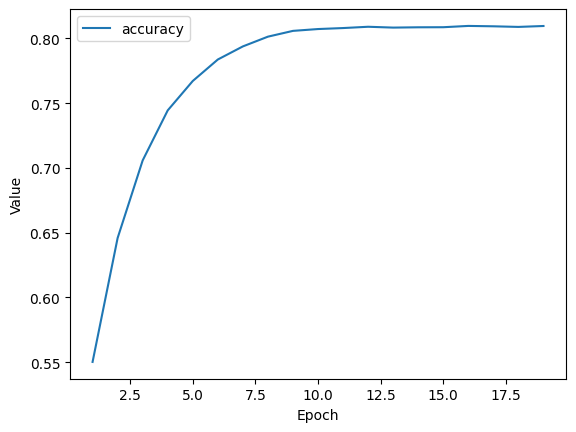

In [ ]:
# متغیرهای زیر ابرپارامترها هستند.
learning_rate = 0.001
epochs = 20
batch_size = 100

label_name = "median_house_value_is_high"
classification_threshold = 0.35

# معیارهایی را که مدل اندازه گیری می کند، تعیین کنید.
METRICS = [
            tf.keras.metrics.BinaryAccuracy(name='accuracy',
                                            threshold=classification_threshold)
           ]

# توپوگرافی مدل را تعیین کنید.
my_model = create_model(inputs, learning_rate, METRICS)

# برای مشاهده یک PNG از لایه‌های این مدل، تماس را لغو نظر کنید
# `tf.keras.utils.plot_model` در زیر. پس از اجرای این سلول کد، کلیک کنید
# پوشه فایل در سمت چپ، سپس فایل «my_classification_model.png».
# tf.keras.utils.plot_model(my_model، "my_classification_model.png")

# آموزش مدل روی مجموعه آموزشی.
epochs, hist = train_model(my_model, train_df_norm, epochs,
                            label_name, batch_size)

# نموداری از متریک(ها) در مقابل دوره ها را رسم کنید.
list_of_metrics_to_plot = ['accuracy']

plot_curve(epochs, hist, list_of_metrics_to_plot)

## مدل را در مقابل مجموعه تست ارزیابی کنید

در پایان آموزش مدل، شما با دقت خاصی در برابر *مجموعه آموزشی* مواجه شدید. برای تعیین دقت مدل خود در برابر *مجموعه تست*، سلول کد زیر را فراخوانی کنید.

In [ ]:
features = {name:np.array(value) for name,value in test_df_norm.items()}
label = np.array(features.pop(label_name))

my_model.evaluate(x = features, y = label, batch_size=batch_size)

30/30 [==============================] - 0s 2ms/step - loss: 0.6539 - accuracy: 0.6910


/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['longitude', 'latitude', 'housing_median_age', 'total_bedrooms', 'population', 'households', 'median_house_value'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


[0.6539024114608765, 0.6909999847412109]

##تمرین2 : مدل واقعی چقدر دقیق است؟

In [ ]:
#@title برای پاسخ احتمالی به Task 2 دوبار کلیک کنید.

# یک مدل کامل می تواند پیش بینی های 100٪ دقیق را انجام دهد.
# مدل ما 70٪ پیش بینی های دقیق انجام می دهد. 70 درصد صداها
# خوب است، اما توجه داشته باشید که مدلی که همیشه حدس می زند
# "میانگین_ارزش_خانه_بالا_نادرست است" 75% خواهد بود.
# دقیق.

##تمرین 3: افزودن معیارهای دقت و فراخوان


تکیه صرف به دقت، به ویژه برای مجموعه داده های نامتعادل طبقاتی (مانند مجموعه ما)، می تواند روش ضعیفی برای قضاوت در مورد مدل طبقه بندی باشد. کد موجود در سلول کد زیر را تغییر دهید تا مدل بتواند نه تنها دقت، بلکه دقت و یادآوری را نیز اندازه گیری کند. ما داریم
دقت و دقت اضافه شده؛ وظیفه شما اضافه کردن یادآوری است. برای جزئیات به [مرجع TensorFlow](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/Recall) مراجعه کنید.


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['longitude', 'latitude', 'housing_median_age', 'total_bedrooms', 'population', 'households', 'median_house_value'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


170/170 [==============================] - 1s 2ms/step - loss: 0.5368 - accuracy: 0.5509 - precision: 0.3501 - recall: 0.9320
Epoch 2/20
170/170 [==============================] - 0s 2ms/step - loss: 0.4982 - accuracy: 0.6291 - precision: 0.3920 - recall: 0.8802
Epoch 3/20
170/170 [==============================] - 0s 2ms/step - loss: 0.4685 - accuracy: 0.6796 - precision: 0.4277 - recall: 0.8354
Epoch 4/20
170/170 [==============================] - 0s 2ms/step - loss: 0.4454 - accuracy: 0.7194 - precision: 0.4639 - recall: 0.7926
Epoch 5/20
170/170 [==============================] - 0s 2ms/step - loss: 0.4277 - accuracy: 0.7444 - precision: 0.4924 - recall: 0.7516
Epoch 6/20
170/170 [==============================] - 0s 2ms/step - loss: 0.4150 - accuracy: 0.7684 - precision: 0.5270 - recall: 0.7092
Epoch 7/20
170/170 [==============================] - 0s 2ms/step - loss: 0.4063 - accuracy: 0.7836 - precision: 0.5544 - recall: 0.6814
Epoch 8/20
170/170 [==============================] 

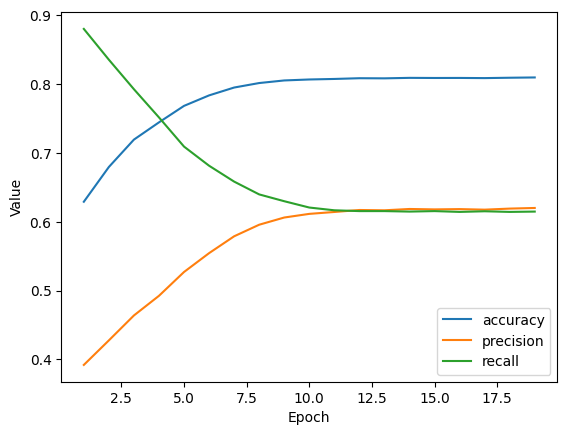

In [ ]:
#@title برای پاسخ احتمالی به Task 3 دوبار کلیک کنید.
# متغیرهای زیر ابرپارامترها هستند.
learning_rate = 0.001
epochs = 20
batch_size = 100

classification_threshold = 0.35
label_name = 'median_house_value_is_high'



# معیارهایی را که مدل اندازه گیری می کند، تعیین کنید.
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy',
                                      threshold=classification_threshold),
      tf.keras.metrics.Precision(thresholds=classification_threshold,
                                 name='precision'
                                 ),
      tf.keras.metrics.Recall(thresholds=classification_threshold,
                              name="recall"),
]

# توپوگرافی مدل را تعیین کنید.
my_model = create_model(inputs, learning_rate, METRICS)



# آموزش مدل روی مجموعه آموزشی.
epochs, hist = train_model(my_model, train_df_norm, epochs,
                            label_name, batch_size)

# نموداری از متریک(ها) در مقابل دوره ها را رسم کنید.

list_of_metrics_to_plot = ['accuracy','precision','recall']
plot_curve(epochs, hist, list_of_metrics_to_plot)

# نمودارهای جدید نشان می دهد که دقت و یادآوری هستند
# تا حدودی در تضاد. یعنی بهبودهایی در یکی از
# آن معیارها ممکن است به معیار دیگر آسیب برساند.

## تمرین4: برای طبقه بندی آستانه را تجربه کسب کن


مقادیر مختلف `classification_threshold` را در سلول کد در «فراخوانی توابع ایجاد، آموزش و ترسیم» آزمایش کنید. کدام مقدار `classification_threshold` بالاترین دقت را ایجاد می‌کند؟

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['longitude', 'latitude', 'housing_median_age', 'total_bedrooms', 'population', 'households', 'median_house_value'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


170/170 [==============================] - 1s 2ms/step - loss: 0.6178 - accuracy: 0.7141 - precision: 0.4488 - recall: 0.6332
Epoch 2/20
170/170 [==============================] - 0s 2ms/step - loss: 0.5466 - accuracy: 0.7885 - precision: 0.5760 - recall: 0.5809
Epoch 3/20
170/170 [==============================] - 0s 2ms/step - loss: 0.4940 - accuracy: 0.8138 - precision: 0.6490 - recall: 0.5550
Epoch 4/20
170/170 [==============================] - 0s 2ms/step - loss: 0.4574 - accuracy: 0.8255 - precision: 0.6926 - recall: 0.5423
Epoch 5/20
170/170 [==============================] - 0s 2ms/step - loss: 0.4337 - accuracy: 0.8303 - precision: 0.7185 - recall: 0.5272
Epoch 6/20
170/170 [==============================] - 0s 2ms/step - loss: 0.4180 - accuracy: 0.8329 - precision: 0.7383 - recall: 0.5128
Epoch 7/20
170/170 [==============================] - 0s 2ms/step - loss: 0.4084 - accuracy: 0.8332 - precision: 0.7538 - recall: 0.4938
Epoch 8/20
170/170 [==============================] 

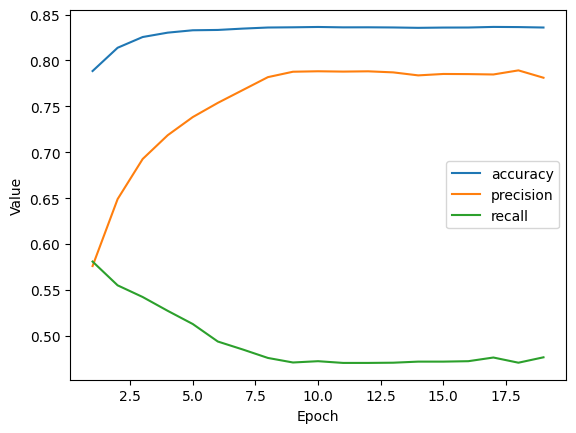

In [ ]:
#@title برای پاسخ احتمالی به Task 4 دوبار کلیک کنید.
# متغیرهای زیر ابرپارامترها هستند.
learning_rate = 0.001
epochs = 20
batch_size = 100

classification_threshold = 0.52
label_name = 'median_house_value_is_high'



# معیارهایی را که مدل اندازه گیری می کند، تعیین کنید.
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy',
                                      threshold=classification_threshold),
      tf.keras.metrics.Precision(thresholds=classification_threshold,
                                 name='precision'
                                 ),
      tf.keras.metrics.Recall(thresholds=classification_threshold,
                              name="recall"),
]

# توپوگرافی مدل را تعیین کنید.
my_model = create_model(inputs, learning_rate, METRICS)



# آموزش مدل روی مجموعه آموزشی.
epochs, hist = train_model(my_model, train_df_norm, epochs,
                            label_name, batch_size)

# نموداری از متریک(ها) در مقابل دوره ها را رسم کنید.

list_of_metrics_to_plot = ['accuracy','precision','recall']
plot_curve(epochs, hist, list_of_metrics_to_plot)

# `classification_threshold` کمی بیش از 0.5
#به نظر می رسد بالاترین دقت (حدود 83٪) را ایجاد می کند.
# افزایش `classification_threshold` به 0.9 افت
# دقت در حدود 5٪. پایین آوردن
# `classification_threshold` تا 0.3 دقت را کاهش می‌دهد
# حدود 3 درصد


## تمرین 5: عملکرد مدل را خلاصه کنید (اگر زمان اجازه دهد)

اگر زمان اجازه می‌دهد، یک معیار دیگر اضافه کنید که تلاش می‌کند عملکرد کلی مدل را خلاصه کند.

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['longitude', 'latitude', 'housing_median_age', 'total_bedrooms', 'population', 'households', 'median_house_value'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


170/170 [==============================] - 1s 2ms/step - loss: 0.8255 - auc: 0.3624
Epoch 2/20
170/170 [==============================] - 0s 2ms/step - loss: 0.7356 - auc: 0.4086
Epoch 3/20
170/170 [==============================] - 0s 2ms/step - loss: 0.6568 - auc: 0.4937
Epoch 4/20
170/170 [==============================] - 0s 3ms/step - loss: 0.5905 - auc: 0.6351
Epoch 5/20
170/170 [==============================] - 0s 3ms/step - loss: 0.5374 - auc: 0.7462
Epoch 6/20
170/170 [==============================] - 0s 3ms/step - loss: 0.4967 - auc: 0.7963
Epoch 7/20
170/170 [==============================] - 0s 3ms/step - loss: 0.4665 - auc: 0.8191
Epoch 8/20
170/170 [==============================] - 0s 3ms/step - loss: 0.4449 - auc: 0.8284
Epoch 9/20
170/170 [==============================] - 0s 3ms/step - loss: 0.4292 - auc: 0.8330
Epoch 10/20
170/170 [==============================] - 0s 2ms/step - loss: 0.4178 - auc: 0.8347
Epoch 11/20
170/170 [==============================] - 0s 3m

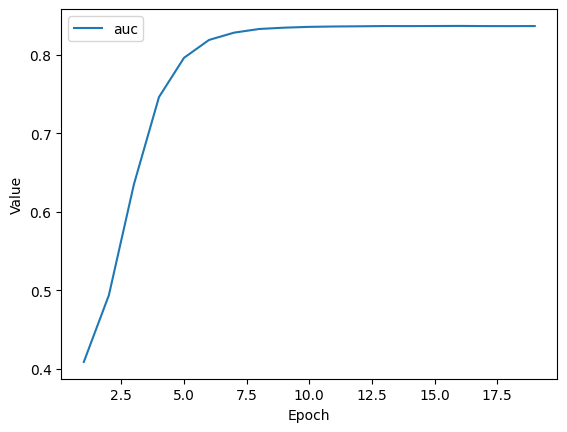

In [ ]:
#@title برای پاسخ احتمالی به Task 5 دوبار کلیک کنید.

# متغیرهای زیر ابرپارامترها هستند.
learning_rate = 0.001
epochs = 20
batch_size = 100

classification_threshold = 0.35
label_name = 'median_house_value_is_high'



# AUC یک معیار "خلاصه" معقول برای است
# مدل های طبقه بندی
# در اینجا تعریف به روز شده METRICS به است
# اندازه گیری AUC:
METRICS = [
      tf.keras.metrics.AUC(num_thresholds=100,
                                 name='auc'
                                 ),
]
# توپوگرافی مدل را تعیین کنید.
my_model = create_model(inputs, learning_rate, METRICS)



# آموزش مدل روی مجموعه آموزشی.
epochs, hist = train_model(my_model, train_df_norm, epochs,
                            label_name, batch_size)

# نموداری از متریک(ها) در مقابل دوره ها را رسم کنید.

list_of_metrics_to_plot = ['auc']
plot_curve(epochs, hist, list_of_metrics_to_plot)

# نمودارهای جدید نشان می دهد که دقت و یادآوری هستند
# تا حدودی در تضاد. یعنی بهبودهایی در یکی از
# آن معیارها ممکن است به معیار دیگر آسیب برساند.